In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [38]:
dataset = fetch_california_housing()

In [39]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
data['Price'] = dataset.target

In [44]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [45]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [46]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


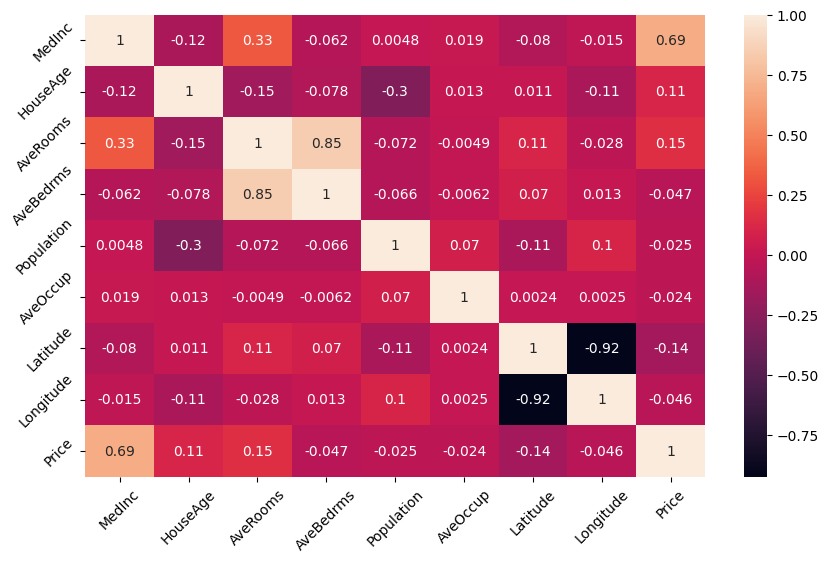

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, color = 'b')
plt.tick_params(rotation = 45)

In [69]:
X = data.iloc[:,:-1]  #independant features
y = data.iloc[:,-1:]  #dependent features


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [72]:
X_train.shape

(13828, 8)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
## Model training
from sklearn.linear_model import LinearRegression

In [76]:
regression = LinearRegression()

In [79]:
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"result: mae: {mae}, r2: {r2}, rmse: {rmse}")

result: mae: 0.5369686543372459, r2: 0.5970494128783952, rmse: 0.7327814505957735


In [81]:
# ADjusted R2 score

1 - (1 - r2)*(len(y_test) - 1)/(len(y_test) - X_test_scaled.shape[1] - 1)

0.5965755624158091

##  Assumptions

Text(0, 0.5, 'Test predicted data')

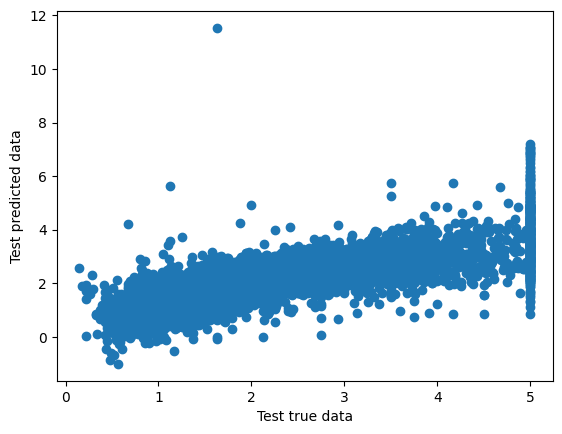

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test true data")
plt.ylabel("Test predicted data")

In [85]:
residuals = y_test - y_pred
residuals

,Price
20046,-0.248635
3024,-1.308502
15663,2.294552
20484,-0.647254
9814,0.175899
...,...
15316,0.536187
14772,-0.744167
12870,-0.188031
13476,-0.359730


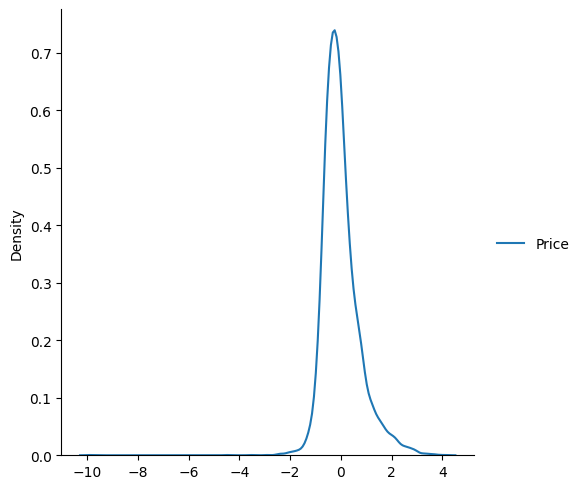

In [87]:
sns.displot(residuals, kind="kde")

In [88]:
import pickle

pickle.dump(regression, open('regressor.pkl', 'wb'))